In [1]:
import pandas as pd
from sportsref.baseball import Franchise
from sportsref.util import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def pull_tm_gamelogs(tm, yr):
    df = Franchise(tm).season(yr).pitching_pages("game_logs").get_df('team_pitching_gamelogs')
    df["team"] = tm
    df["year"] = yr
    return df

In [3]:
tms = get_players_or_teams('baseball', 'team').name

In [4]:
dfs = []
for tm in tms:
    for yr in range(2019,2022):
        dfs.append(pull_tm_gamelogs(tm, yr))
df = pd.concat(dfs)

Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_pitching_gamelogs']
Available tables: ['run_support', 'team_

In [5]:
df.groupby(['team', 'year']).Gtm.max().unstack()

year,2019,2020,2021
team,,,
Arizona Diamondbacks,162,60,43
Atlanta Braves,162,60,42
Baltimore Orioles,162,60,41
Boston Red Sox,162,60,43
Chicago Cubs,162,60,41
Chicago White Sox,161,60,41
Cincinnati Reds,162,60,40
Cleveland Indians,162,60,40
Colorado Rockies,162,60,43


In [6]:
gm36 = df.query('Gtm == 36')

In [7]:
plot_df = gm36[["team", "year", "ERA"]]

In [8]:
plot_df

,team,year,ERA
35,Arizona Diamondbacks,2019,4.53
35,Arizona Diamondbacks,2020,5.12
35,Arizona Diamondbacks,2021,4.63
35,Boston Red Sox,2019,4.66
35,Boston Red Sox,2020,6.16
...,...,...,...
35,Texas Rangers,2020,5.12
35,Texas Rangers,2021,4.32
35,Minnesota Twins,2019,3.69
35,Minnesota Twins,2020,3.78


In [9]:
plt.xkcd()

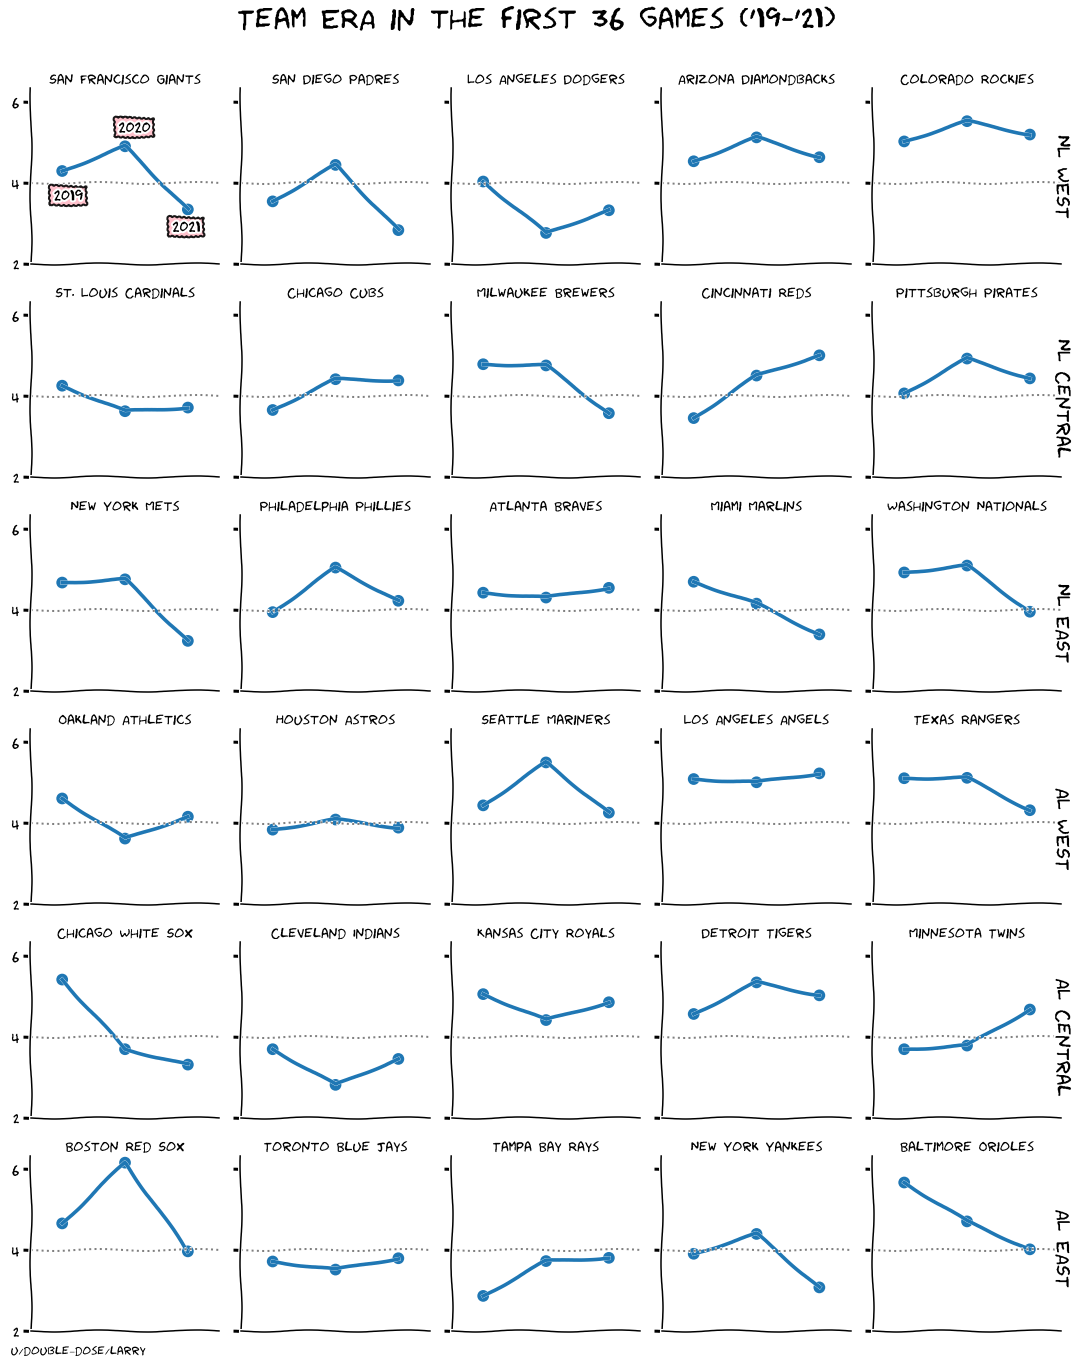

In [16]:
#plot this baby
g = sns.FacetGrid(plot_df,
#                   col_wrap=4,
                  col_order=[
                      'San Francisco Giants','San Diego Padres','Los Angeles Dodgers','Arizona Diamondbacks', 'Colorado Rockies',
                      'St. Louis Cardinals','Chicago Cubs','Milwaukee Brewers', 'Cincinnati Reds','Pittsburgh Pirates',
                      'New York Mets','Philadelphia Phillies', 'Atlanta Braves','Miami Marlins', 'Washington Nationals',  
                      'Oakland Athletics', 'Houston Astros', 'Seattle Mariners', 'Los Angeles Angels', 'Texas Rangers',
                      'Chicago White Sox', 'Cleveland Indians', 'Kansas City Royals', 'Detroit Tigers',  'Minnesota Twins',
                      'Boston Red Sox', 'Toronto Blue Jays' , 'Tampa Bay Rays', 'New York Yankees', 'Baltimore Orioles' ],
                  col="team",
                  col_wrap=5,
                  sharey=True,
                  sharex=True,
                 margin_titles=True)
g.map(sns.pointplot, "year", "ERA", order=[2019,2020,2021])
g.map(plt.axhline, y=4, ls=":", c=".5")
g.fig.subplots_adjust(wspace=0, hspace=.2)
g.set_titles("{col_name}")
g.set_ylabels("", size=20)
g.set(xticks=[], yticks=[2,4,6])
g.fig.suptitle("Team ERA in the first 36 games ('19-'21)", size=30, y=1.04)
g.fig.tight_layout(w_pad=1)

bbox_props = dict(boxstyle="roundtooth", fc="pink", ec='k', lw=2, alpha=0.9)
# label first plot as a guide, instead of a legend
plt.annotate('2019',
            xy=(.05, .86), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=16, bbox=bbox_props)

plt.annotate('2020',
            xy=(.11, .91), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=16, bbox=bbox_props)

plt.annotate('2021',
            xy=(.16, .837), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=16, bbox=bbox_props)

# label NL divisions
plt.annotate('NL WEST',
            xy=(.98, .90), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20, rotation=-90)
plt.annotate('NL Central',
            xy=(.98, .75), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20, rotation=-90)
plt.annotate('NL EAST',
            xy=(.98, .57), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20, rotation=-90)

# label AL divisions
plt.annotate('AL WEST',
            xy=(.98, .42), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20, rotation=-90)
plt.annotate('AL Central',
            xy=(.98, .28), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20, rotation=-90)
plt.annotate('AL EAST',
            xy=(.98, .11), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20, rotation=-90)

#sign
plt.annotate('u/double_dose/larry',
            xy=(.01, .01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)

g.savefig("yoy_era.png")